# Download (and save) seismic waveforms 

This notebook fetch seismic waveforms for different seismic events from ESEC (Exotic Seismic Event Catalog). It first looks at the available seismic stations for different events within a given radius, and then tries to download the waveforms for each events and save them in a given directory.

This code was written by Léonard Seydoux (<seydoux@ipgp.fr>) and Thibaut Céci (<thi.ceci@gmail.com>). 

In [1]:
from tqdm.notebook import tqdm

import catalog
import histograms
import waveform

catalog.display_params_for_catalog()
tqdm.pandas()

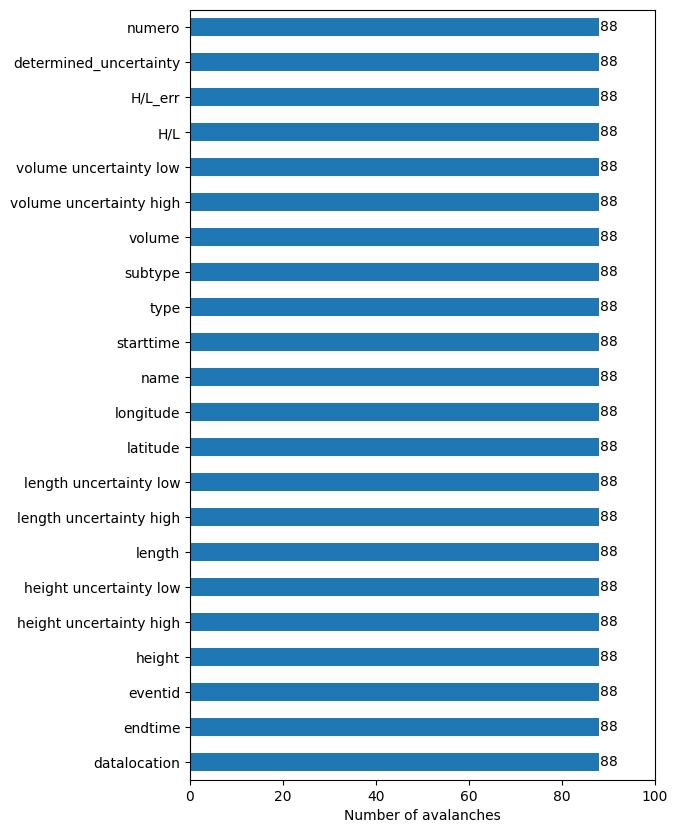

In [2]:
ESEC_avalanches = catalog.load("catalog/3_ESEC_avalanches_88.pickle")

ESEC_avalanches = ESEC_avalanches.reset_index(drop=True) #To reset all avalanche indexes and end at 88 events
ESEC_avalanches['numero'] = range(88) #for have a better manipulation of the events

histograms.open_catalog(ESEC_avalanches, pos_number=0.11, xlim=100)

## Fetch available stations for each event

Get the inventory of waveforms per avalanche for a radius = 5° and put it in a new column

In [3]:
ESEC_avalanches["inventory"] = ESEC_avalanches.progress_apply( 
    lambda row: waveform.download_inventory(row, maxradius=5), axis=1
)

ESEC_avalanches.to_pickle("catalog/4_ESEC_avalanches_88.pickle")

  0%|          | 0/88 [00:00<?, ?it/s]

ERROR FOR DOWNLOAD INVENTORY. Attempt 1 of 10. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


ERROR FOR DOWNLOAD INVENTORY. Attempt 2 of 10. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


ERROR FOR DOWNLOAD INVENTORY. Attempt 3 of 10. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


ERROR FOR DOWNLOAD INVENTORY. Attempt 4 of 10. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


ERROR FOR DOWNLOAD INVENTORY. Attempt 5 of 10. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


ERROR FOR DOWNLOAD INVENTORY. Attempt 6 of 10. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


ERROR FOR DOWNLOAD INVENTORY. Attempt 7 of 10. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


ERROR FOR DOWNLOAD INVENTORY. Atte

## Download and save the waveforms

This cell download the waveform of all events in the catalog (if any) and save them into the waveforms directory in the data folder. If no data is available, then the event is skipped.

In [ ]:
for event in tqdm(ESEC_avalanches.itertuples(), total=len(ESEC_avalanches)):
    #if event.Index >= 0 :
        stream = waveform.download_stream(event, time_margins=500, print_error=True)
        if stream:
            stream.write(f"sismogrammes/{event.Index:03d}.pickle", format="PICKLE")